```
This software is a part of GPU Ocean.
```

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import os
import sys

#Import packages we need
import numpy as np
from netCDF4 import Dataset

import datetime

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc

import glob
import json

#Set large figure sizes
#plt.rcParams["animation.html"] = "jshtml" #Javascript 
plt.rcParams["animation.html"] = "html5" #mp4
plt.rcParams["figure.dpi"] = 600.0 #highres movies/plots

plt.rcParams["animation.writer"] = 'ffmpeg' 
plt.rcParams["animation.codec"] = 'h264' 

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = 'serif'

In [2]:
strong_scaling_dir = 'strong_scaling_experiments/'
#strong_scaling_dir = 'strong_scaling_480_particles_experiments/'

weak_scaling_dir = 'weak_scaling_experiments/'

In [3]:
###
### read data from json-files and sort
###

metadata_strong_scaling_filenames = glob.glob(strong_scaling_dir + '/EPS*/EPS*metadata.json')
strong_scaling_filenames = glob.glob(strong_scaling_dir + '/EPS*/EPS*profiling.json')

#print(str(metadata_strong_scaling_filenames))
#print(str(strong_scaling_filenames))

strong_scaling_metadata = [None] * len(metadata_strong_scaling_filenames)
strong_scaling_runs = [None] * len(strong_scaling_filenames)

for i in range(len(strong_scaling_runs)):
    with open(metadata_strong_scaling_filenames[i]) as json_file:
        strong_scaling_metadata[i] = json.load(json_file)
        
    with open(strong_scaling_filenames[i]) as json_file:
        strong_scaling_runs[i] = json.load(json_file)

#print("Before sorting:")
#for i in range(len(strong_scaling_metadata)):
#    #print(strong_scaling_metadata[i]['timestamp'])
#    #print(strong_scaling_metadata[i]['local_ensemble_size'])
#    print(strong_scaling_runs[i]['total'])

zipped_strong_scaling = zip(strong_scaling_metadata, strong_scaling_runs)
zipped_strong_scaling = sorted(zipped_strong_scaling, key=lambda k: k[0]['timestamp'])
strong_scaling_metadata, strong_scaling_runs = zip(*zipped_strong_scaling)

#print("After sorting:")
#for i in range(len(strong_scaling_metadata)):
#    #print(strong_scaling_metadata[i]['timestamp'])
#    #print(strong_scaling_metadata[i]['local_ensemble_size'])
#    print(strong_scaling_runs[i]['total'])


metadata_weak_scaling_filenames = glob.glob(weak_scaling_dir + '/EPS*/EPS*metadata.json')
weak_scaling_filenames = glob.glob(weak_scaling_dir + '/EPS*/EPS*profiling.json')

weak_scaling_metadata = [None] * len(metadata_weak_scaling_filenames)
weak_scaling_runs = [None] * len(weak_scaling_filenames)

for i in range(len(weak_scaling_runs)):
    with open(metadata_weak_scaling_filenames[i]) as json_file:
        weak_scaling_metadata[i] = json.load(json_file)
        
    with open(weak_scaling_filenames[i]) as json_file:
        weak_scaling_runs[i] = json.load(json_file)

zipped_weak_scaling = zip(weak_scaling_metadata, weak_scaling_runs)
zipped_weak_scaling = sorted(zipped_weak_scaling, key=lambda k: k[0]['timestamp'])
weak_scaling_metadata, weak_scaling_runs = zip(*zipped_weak_scaling)

In [4]:
print(strong_scaling_metadata[-1]['num_rank'])

48


In [5]:
font_size = 16

#plt.rc('font', size=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

/modules/centos7/python/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide


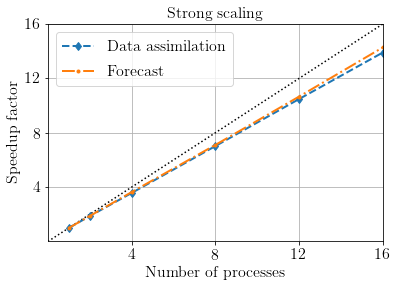

In [6]:
###
### extract data for plotting
###

local_ensemble_sizes = np.empty(len(metadata_strong_scaling_filenames))
num_ranks = np.empty(len(metadata_strong_scaling_filenames))

strong_scaling_times = np.empty(len(strong_scaling_filenames))
strong_scaling_da_times = np.empty(len(strong_scaling_filenames))
strong_scaling_forecast_times = np.empty(len(strong_scaling_filenames))

for i in range(len(strong_scaling_runs)):
    local_ensemble_sizes[i] = strong_scaling_metadata[i]['local_ensemble_size']
    num_ranks[i] = strong_scaling_metadata[i]['num_rank']
    
    strong_scaling_times[i] = strong_scaling_runs[i]['total']
    strong_scaling_da_times[i] = strong_scaling_runs[i]['data_assimilation']
    strong_scaling_forecast_times[i] = strong_scaling_runs[i]['forecast']

# normalize wrt. the single slowest run
#max_strong_scaling_time = max(strong_scaling_times[:])
#strong_scaling_times[:] = strong_scaling_times[:]/max_strong_scaling_time
#strong_scaling_da_times[:] = strong_scaling_da_times[:]/max(strong_scaling_da_times[:])
#strong_scaling_forecast_times[:] = strong_scaling_forecast_times[:]/max(strong_scaling_forecast_times[:])

strong_scaling_speedup = strong_scaling_times[0]/strong_scaling_times[:]
strong_scaling_da_speedup = strong_scaling_da_times[0]/strong_scaling_da_times[:]
strong_scaling_forecast_speedup = strong_scaling_forecast_times[0]/strong_scaling_forecast_times[:]


###
### strong scaling plot
###

def theoretic_speed_up(nodes, serial_part):
    return 1 / (serial_part + (1-serial_part) / nodes)

plt.figure()
plt.title('Strong scaling', fontsize=16)

plt.plot(np.arange(0,17), theoretic_speed_up(np.arange(0,17), 0), 'k:')
#plt.plot(np.arange(0,17), theoretic_speed_up(np.arange(0,17), 0.02), 'k:')

#plt.plot(num_ranks[0:6],strong_scaling_speedup[0:6], marker='*', linewidth=2.0, label='Total')
plt.plot(num_ranks[0:6],strong_scaling_da_speedup[0:6], '--', marker='d', linewidth=2.0, label='Data assimilation')
plt.plot(num_ranks[0:6],strong_scaling_forecast_speedup[0:6], '-.', marker='.', linewidth=2.0, label='Forecast')
plt.xticks([4, 8, 12, 16])
plt.yticks([4, 8, 12, 16])
#plt.axis('square')
plt.grid()
plt.legend()

plt.xlim(0,16)
plt.ylim(0,16)

plt.xlabel('Number of processes')
plt.ylabel('Speedup factor')

plt.savefig("strong_scaling.pdf", bbox_inches='tight')

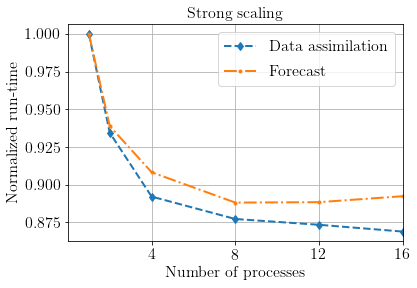

In [7]:
###
### extract data for plotting
###

local_ensemble_sizes = np.empty(len(metadata_strong_scaling_filenames))
num_ranks = np.empty(len(metadata_strong_scaling_filenames))

strong_scaling_times = np.empty(len(strong_scaling_filenames))
strong_scaling_da_times = np.empty(len(strong_scaling_filenames))
strong_scaling_forecast_times = np.empty(len(strong_scaling_filenames))

for i in range(len(strong_scaling_runs)):
    local_ensemble_sizes[i] = strong_scaling_metadata[i]['local_ensemble_size']
    num_ranks[i] = strong_scaling_metadata[i]['num_rank']
    
    strong_scaling_times[i] = strong_scaling_runs[i]['total']
    strong_scaling_da_times[i] = strong_scaling_runs[i]['data_assimilation']
    strong_scaling_forecast_times[i] = strong_scaling_runs[i]['forecast']

strong_scaling_speedup = strong_scaling_times[0]/(strong_scaling_times[:]*num_ranks[:])
strong_scaling_da_speedup = strong_scaling_da_times[0]/(strong_scaling_da_times[:]*num_ranks[:])
strong_scaling_forecast_speedup = strong_scaling_forecast_times[0]/(strong_scaling_forecast_times[:]*num_ranks[:])


###
### strong scaling plot (alternative version)
###

plt.figure()
plt.title('Strong scaling', fontsize=16)

#plt.plot(num_ranks[0:6],strong_scaling_speedup[0:6], marker='*', linewidth=2.0, label='Total')
plt.plot(num_ranks[0:6],strong_scaling_da_speedup[0:6], '--', marker='d', linewidth=2.0, label='Data assimilation')
plt.plot(num_ranks[0:6],strong_scaling_forecast_speedup[0:6], '-.', marker='.', linewidth=2.0, label='Forecast')
plt.xticks([4, 8, 12, 16])
plt.grid()
plt.legend()

plt.xlim(0,16)

plt.xlabel('Number of processes')
plt.ylabel('Normalized run-time')

plt.savefig("strong_scaling_2.pdf", bbox_inches='tight')

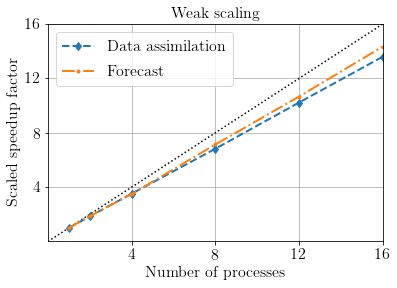

In [8]:
###
### extract data for plotting
###

global_ensemble_sizes = np.empty(len(metadata_weak_scaling_filenames))
num_ranks = np.empty(len(metadata_weak_scaling_filenames))

weak_scaling_times = np.empty(len(weak_scaling_filenames))
weak_scaling_da_times = np.empty(len(weak_scaling_filenames))
weak_scaling_forecast_times = np.empty(len(weak_scaling_filenames))

for i in range(len(weak_scaling_runs)):
    global_ensemble_sizes[i] = weak_scaling_metadata[i]['global_ensemble_size']
    num_ranks[i] = weak_scaling_metadata[i]['num_rank']
    
    weak_scaling_times[i] = weak_scaling_runs[i]['total']
    weak_scaling_da_times[i] = weak_scaling_runs[i]['data_assimilation']
    weak_scaling_forecast_times[i] = weak_scaling_runs[i]['forecast']

# normalize wrt. the single slowest run
#max_weak_scaling_time = max(weak_scaling_times[:])
#weak_scaling_times[:] = weak_scaling_times[:]/max_weak_scaling_time
#weak_scaling_da_times[:] = weak_scaling_da_times[:]/max(weak_scaling_da_times[:])
#weak_scaling_forecast_times[:] = weak_scaling_forecast_times[:]/max(weak_scaling_forecast_times[:])

weak_scaling_speedup = (weak_scaling_times[0]/weak_scaling_times[:])*num_ranks
weak_scaling_da_speedup = (weak_scaling_da_times[0]/weak_scaling_da_times[:])*num_ranks
weak_scaling_forecast_speedup = (weak_scaling_forecast_times[0]/weak_scaling_forecast_times[:])*num_ranks


###
### weak scaling plot
###

def scaled_speed_up(nodes, serial_part):
    return serial_part + (1-serial_part) * nodes

plt.figure()
plt.title('Weak scaling', fontsize=16)

plt.plot(np.arange(0,17), scaled_speed_up(np.arange(0,17), 0), 'k:')
#plt.plot(np.arange(0,17), scaled_speed_up(np.arange(0,17), 0.3), 'k:')

#plt.plot(num_ranks[0:6],weak_scaling_speedup[0:6], marker='*', linewidth=2.0, label='Total')
plt.plot(num_ranks[0:6],weak_scaling_da_speedup[0:6], '--', marker='d', linewidth=2.0, label='Data assimilation')
plt.plot(num_ranks[0:6],weak_scaling_forecast_speedup[0:6], '-.', marker='.', linewidth=2.0, label='Forecast')
plt.xticks([4, 8, 12, 16])
plt.yticks([4, 8, 12, 16])
#plt.axis('square')
plt.grid()
plt.legend()

plt.xlim(0,16)
plt.ylim(0,16)

plt.xlabel('Number of processes')
plt.ylabel('Scaled speedup factor')

plt.savefig("weak_scaling.pdf", bbox_inches='tight')

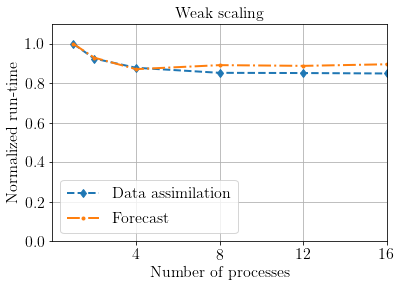

In [11]:
###
### extract data for plotting
###

global_ensemble_sizes = np.empty(len(metadata_weak_scaling_filenames))
num_ranks = np.empty(len(metadata_weak_scaling_filenames))

weak_scaling_times = np.empty(len(weak_scaling_filenames))
weak_scaling_da_times = np.empty(len(weak_scaling_filenames))
weak_scaling_forecast_times = np.empty(len(weak_scaling_filenames))

for i in range(len(weak_scaling_runs)):
    global_ensemble_sizes[i] = weak_scaling_metadata[i]['global_ensemble_size']
    num_ranks[i] = weak_scaling_metadata[i]['num_rank']
    
    weak_scaling_times[i] = weak_scaling_runs[i]['total']
    weak_scaling_da_times[i] = weak_scaling_runs[i]['data_assimilation']
    weak_scaling_forecast_times[i] = weak_scaling_runs[i]['forecast']

weak_scaling_speedup = (weak_scaling_times[0]/(weak_scaling_times[:]*num_ranks[:]))*num_ranks
weak_scaling_da_speedup = (weak_scaling_da_times[0]/(weak_scaling_da_times[:]*num_ranks[:]))*num_ranks
weak_scaling_forecast_speedup = (weak_scaling_forecast_times[0]/(weak_scaling_forecast_times[:]*num_ranks[:]))*num_ranks


###
### weak scaling plot (alternative version)
###

plt.figure()
plt.title('Weak scaling', fontsize=16)

#plt.plot(num_ranks[0:6],weak_scaling_speedup[0:6], marker='*', linewidth=2.0, label='Total')
plt.plot(num_ranks[0:6],weak_scaling_da_speedup[0:6], '--', marker='d', linewidth=2.0, label='Data assimilation')
plt.plot(num_ranks[0:6],weak_scaling_forecast_speedup[0:6], '-.', marker='.', linewidth=2.0, label='Forecast')
plt.xticks([4, 8, 12, 16])
plt.grid()
plt.legend()

plt.xlim(0,16)
plt.ylim(0,1.1)

plt.xlabel('Number of processes')
plt.ylabel('Normalized run-time')

plt.savefig("weak_scaling_2.pdf", bbox_inches='tight')